In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from IPython import get_ipython
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('Crop_recommendation.csv')

In [5]:
df.head()

,N,P,K,temperature,humidity,ph,rainfall,label
0,90,42,43,20.879744,82.002744,6.502985,202.935536,rice
1,85,58,41,21.770462,80.319644,7.038096,226.655537,rice
2,60,55,44,23.004459,82.320763,7.840207,263.964248,rice
3,74,35,40,26.491096,80.158363,6.980401,242.864034,rice
4,78,42,42,20.130175,81.604873,7.628473,262.717340,rice


In [6]:
df.tail()

,N,P,K,temperature,humidity,ph,rainfall,label
2195,107,34,32,26.774637,66.413269,6.780064,177.774507,coffee
2196,99,15,27,27.417112,56.636362,6.086922,127.924610,coffee
2197,118,33,30,24.131797,67.225123,6.362608,173.322839,coffee
2198,117,32,34,26.272418,52.127394,6.758793,127.175293,coffee
2199,104,18,30,23.603016,60.396475,6.779833,140.937041,coffee


In [8]:
df.shape

(2200, 8)

In [9]:
df.columns

Index(['N', 'P', 'K', 'temperature', 'humidity', 'ph', 'rainfall', 'label'], dtype='object')

In [10]:
df.duplicated().sum()

0

In [11]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


In [13]:
df.describe()

,N,P,K,temperature,humidity,ph,rainfall
count,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000,2200.000000
mean,50.551818,53.362727,48.149091,25.616244,71.481779,6.469480,103.463655
std,36.917334,32.985883,50.647931,5.063749,22.263812,0.773938,54.958389
min,0.000000,5.000000,5.000000,8.825675,14.258040,3.504752,20.211267
25%,21.000000,28.000000,20.000000,22.769375,60.261953,5.971693,64.551686
50%,37.000000,51.000000,32.000000,25.598693,80.473146,6.425045,94.867624
75%,84.250000,68.000000,49.000000,28.561654,89.948771,6.923643,124.267508
max,140.000000,145.000000,205.000000,43.675493,99.981876,9.935091,298.560117


In [14]:
df.nunique()

N               137
P               117
K                73
temperature    2200
humidity       2200
ph             2200
rainfall       2200
label            22
dtype: int64

In [15]:
df['label'].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [16]:
df['label'].value_counts()

label
rice           100
maize          100
jute           100
cotton         100
coconut        100
papaya         100
orange         100
apple          100
muskmelon      100
watermelon     100
grapes         100
mango          100
banana         100
pomegranate    100
lentil         100
blackgram      100
mungbean       100
mothbeans      100
pigeonpeas     100
kidneybeans    100
chickpea       100
coffee         100
Name: count, dtype: int64

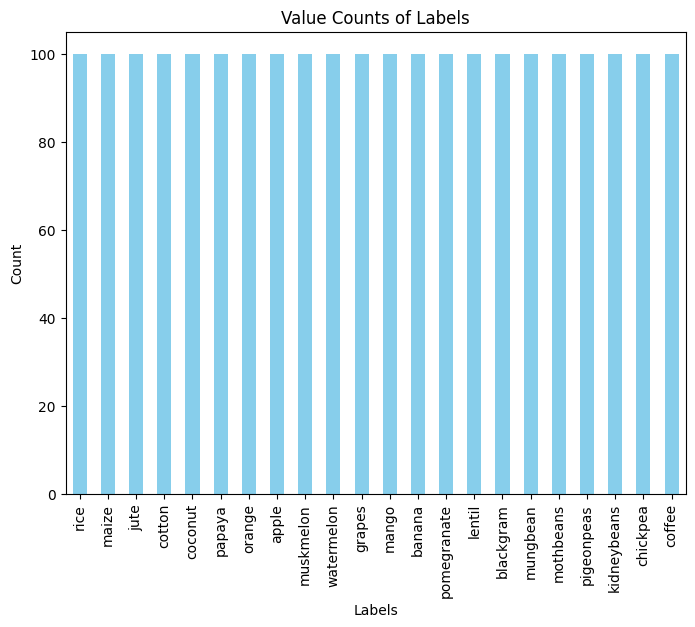

In [17]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and 'label' is the column of interest
label_counts = df['label'].value_counts()

# Plotting the bar graph
plt.figure(figsize=(8, 6))
label_counts.plot(kind='bar', color='skyblue')

# Adding labels and title
plt.title('Value Counts of Labels')
plt.xlabel('Labels')
plt.ylabel('Count')

# Display the graph
plt.show()


In [18]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [19]:
df['label'] = encoder.fit_transform(df['label'])

In [20]:
x = df.drop(['label'], axis=1)
y = df[['label']]

In [21]:
y['label'].value_counts()


label
20    100
11    100
8     100
6     100
4     100
17    100
16    100
0     100
15    100
21    100
7     100
12    100
1     100
19    100
10    100
2     100
14    100
13    100
18    100
9     100
3     100
5     100
Name: count, dtype: int64

In [22]:
from sklearn.model_selection import train_test_split

In [49]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.2,random_state=42)

# Output shapes of each set
print("Train set:", x_train.shape, y_train.shape)
print("Test set:", x_test.shape, y_test.shape)


Train set: (1760, 7) (1760, 1)
Test set: (440, 7) (440, 1)


In [42]:
x_train.shape

(1760, 7)

In [43]:
from sklearn.linear_model import LogisticRegression
logistic_r=LogisticRegression()


In [47]:
log_model = logistic_r.fit(x_train,y_train)
y_test_pred = log_model.predict(x_test)

In [48]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [50]:
accuracy_score(y_test,y_test_pred)

0.9454545454545454

In [52]:
from sklearn.ensemble import RandomForestClassifier
rf_classifier = RandomForestClassifier()
rf_model = rf_classifier.fit(x_train,y_train)
y_test_pred = rf_model.predict(x_test)

In [53]:
accuracy_score(y_test,y_test_pred)

0.9931818181818182

In [54]:
from sklearn.svm import SVC
svm=SVC()
svm_model = svm.fit(x_train,y_train)
y_test_pred = svm_model.predict(x_test)

In [55]:
accuracy_score(y_test,y_test_pred)

0.9613636363636363

In [56]:
import pickle

In [57]:
pickle.dump(rf_model,open('crop-recomandation.pkl','wb'))